In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
from Inference_Linearized2 import Inferencer
import IPython.display as ipd

In [2]:
inferencer = Inferencer(
    hp_path= 'Hyper_Parameters_Linearized2.yaml',
    checkpoint_path= './results/Linearized2/Checkpoint/S_81066.pt',
    batch_size= 16
    )

2023-02-01 21:52:11,212 (Inference_Linearized2:99) INFO: Checkpoint loaded at 81066 steps.


In [3]:
durations = [
    [0.326,0.163,0.326,0.489,0.326,0.163,0.814,0.327,0.163,0.163,0.326,0.163,0.489,0.163,0.815,0.326,0.163,0.326,0.489,0.326,0.163,0.326,0.489,0.326,0.326,0.163,0.326,1.467,0.326,0.163,0.326,0.489,0.326,0.163,0.814,0.327,0.163,0.163,0.326,0.163,0.489,0.163,0.815,0.326,0.163,0.326,0.163,0.326,0.489,0.163,0.326,0.326,0.326,0.326,0.163,0.326,0.815],
    ] * 2
lyrics = [
    ['마','음','울','적','한','날','에','<X>','거','리','를','걸','어','보','고','향','기','로','운','칵','테','일','에','취','해','도','보','고','한','편','의','시','가','있','는','<X>','전','시','회','장','도','가','고','밤','새','도','<X>','록','그','리','움','에','편','질','쓰','고','파',],
    ] * 2
notes = [
    [68,68,68,75,73,72,70,0,72,72,72,73,72,67,67,65,65,65,68,68,66,65,63,65,68,67,68,70,68,68,68,75,73,72,70,0,72,72,72,73,72,67,67,65,65,65,67,68,68,65,63,63,65,68,67,70,68,],
    ] * 2
singers = [
    'NAMS',
    'CSD'
    ]
genres = [
    'Children',
    'Children',
    ]

notes = [[(x + 12) if x != 0 else 0 for x in xx] for xx in notes]

[Inference]: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.11s/it]

마음울적한날에 거리를걸어보고향기로운칵테일에취해도보고한편의시가있는 전시회장도가고밤새도 록그리움에편질쓰고파
NAMS
Children



마음울적한날에 거리를걸어보고향기로운칵테일에취해도보고한편의시가있는 전시회장도가고밤새도 록그리움에편질쓰고파
CSD
Children


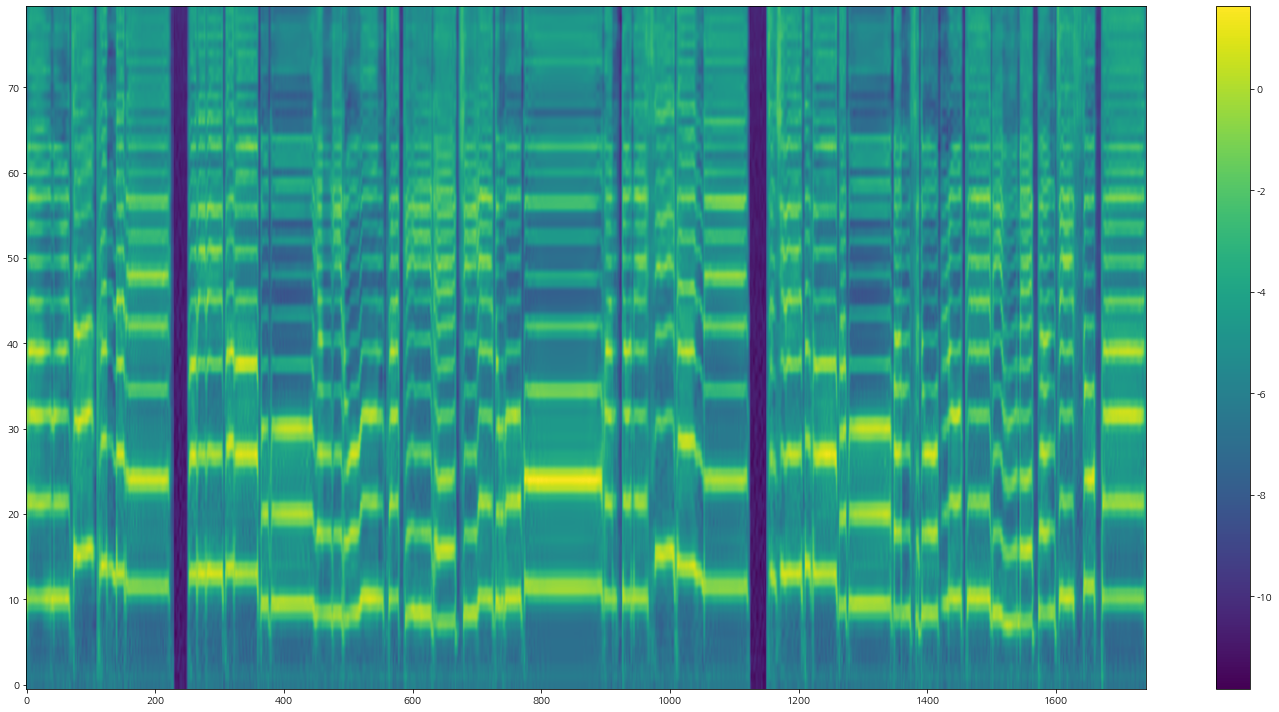

In [4]:
audios = inferencer.Inference_Epoch(
    message_times_list= durations,
    lyrics= lyrics,
    notes= notes,
    singers= singers,
    genres= genres
    )

for lyric, singer, genre, audio in zip(lyrics, singers, genres, audios):
    print(''.join(lyric).replace('<X>', ' '))
    print(singer)
    print(genre)
    ipd.display(ipd.Audio(audio, rate= inferencer.hp.Sound.Sample_Rate))
    print()